In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os, json
from os.path import dirname
from pandas import DataFrame, concat
from tqdm import tqdm
import seaborn as sns 


from parse_twostep import get_data as get_2step


In [2]:
dir = '../data/data_july_24/'
twostep_files = glob('{}s*_twostep_*[0-9]'.format(dir))
twostep_files2 = glob('{}s*_twostep_*[0-9].json'.format(dir))

for i in twostep_files2 :
    twostep_files.append(i)

twostep_data = get_2step(twostep_files, 22)


100%|██████████| 26/26 [00:00<00:00, 37.50it/s]


In [12]:
particiapnts_df = pd.read_csv('participants.csv', sep=",")  
valid_2step_participants = particiapnts_df[(particiapnts_df['2STEP_1']==True)& (particiapnts_df['2STEP_2']==True)& (particiapnts_df['VALID']==True)].participant_id.to_numpy()

In [18]:
len(twostep_files)

26

In [19]:
valid_2step_participants

array([101, 102, 103, 104, 105, 105, 107, 108, 109, 110, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128,
       129, 133, 136, 131])

In [24]:
twostep_data.subject = twostep_data.subject.astype(int)

In [26]:
valid_2steo_data = twostep_data[twostep_data.subject.isin(valid_2step_participants)]

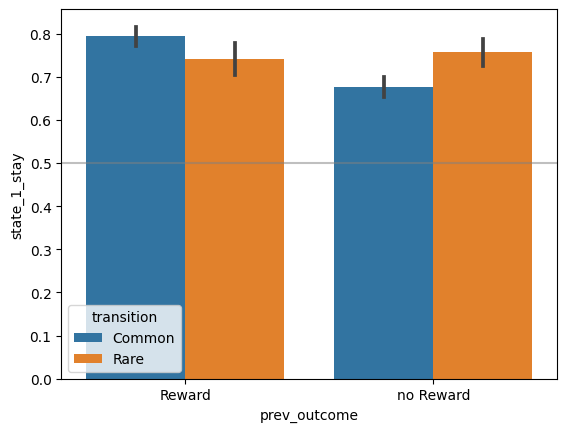

In [95]:
# always same key? looks about 50%

g = sns.barplot(data=valid_2steo_data,
            x='prev_outcome', y='state_1_stay',
            hue='prev_trans', hue_order=[1,0],
            order=[1,0])

g.set_xticklabels(['Reward', 'no Reward'])

leg = g.legend()
leg.set_title('prev transition')

new_labels =['Common', 'Rare']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

#g.set(xlabel="Reward", ylabel = "Stay")


leg.set_title('transition')

new_labels =['Common', 'Rare']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

plt.axhline(y=.5, c='grey', alpha=.5)




In [59]:
df_tmp = valid_2steo_data.groupby(['subject','prev_outcome','prev_trans']).mean()['state_1_key'].reset_index()#.pivot_table(index='subject', keys = '')


df_tmp['case_reward_common'] = df_tmp[['prev_outcome','prev_trans']].apply(lambda x: (['Reward', 'no Reward'][int(x[0])], ['Common', 'Rare'][int(x[1])]), axis=1)

def get_cond(x):
    if x[0]==0 and x[1]==0: ## reward common
        return 1
    
    if x[0]==1 and x[1]==0: ## no reward common
        return 2
    
    if x[0]==0 and x[1]==1: ##  reward rare
        return 3
    
    if x[0]==1 and x[1]==1: ##  no reward rare
        return 4

df_tmp['case_condition'] = df_tmp[['prev_outcome','prev_trans']].apply(lambda x:get_cond(x), axis=1)



In [67]:
df_tmp.groupby(['subject', 'case_reward_common']).mean()['state_1_key'].reset_index().pivot_table(index='subject', columns='case_reward_common', values='state_1_key')

case_reward_common,"(Reward, Common)","(Reward, Rare)","(no Reward, Common)","(no Reward, Rare)"
subject,,,,
101,0.361111,0.383721,0.450000,0.438596
102,0.588235,0.472222,0.527778,0.379310
103,0.434783,0.625000,0.333333,0.431373
107,0.382353,0.532258,0.458333,0.530864
109,0.545455,0.535211,0.545455,0.546875
110,0.588235,0.604938,0.653846,0.482759
114,0.617284,0.530303,0.600000,0.522059
116,0.916667,0.925926,0.960000,0.957143
117,0.133333,0.237500,0.280000,0.171875


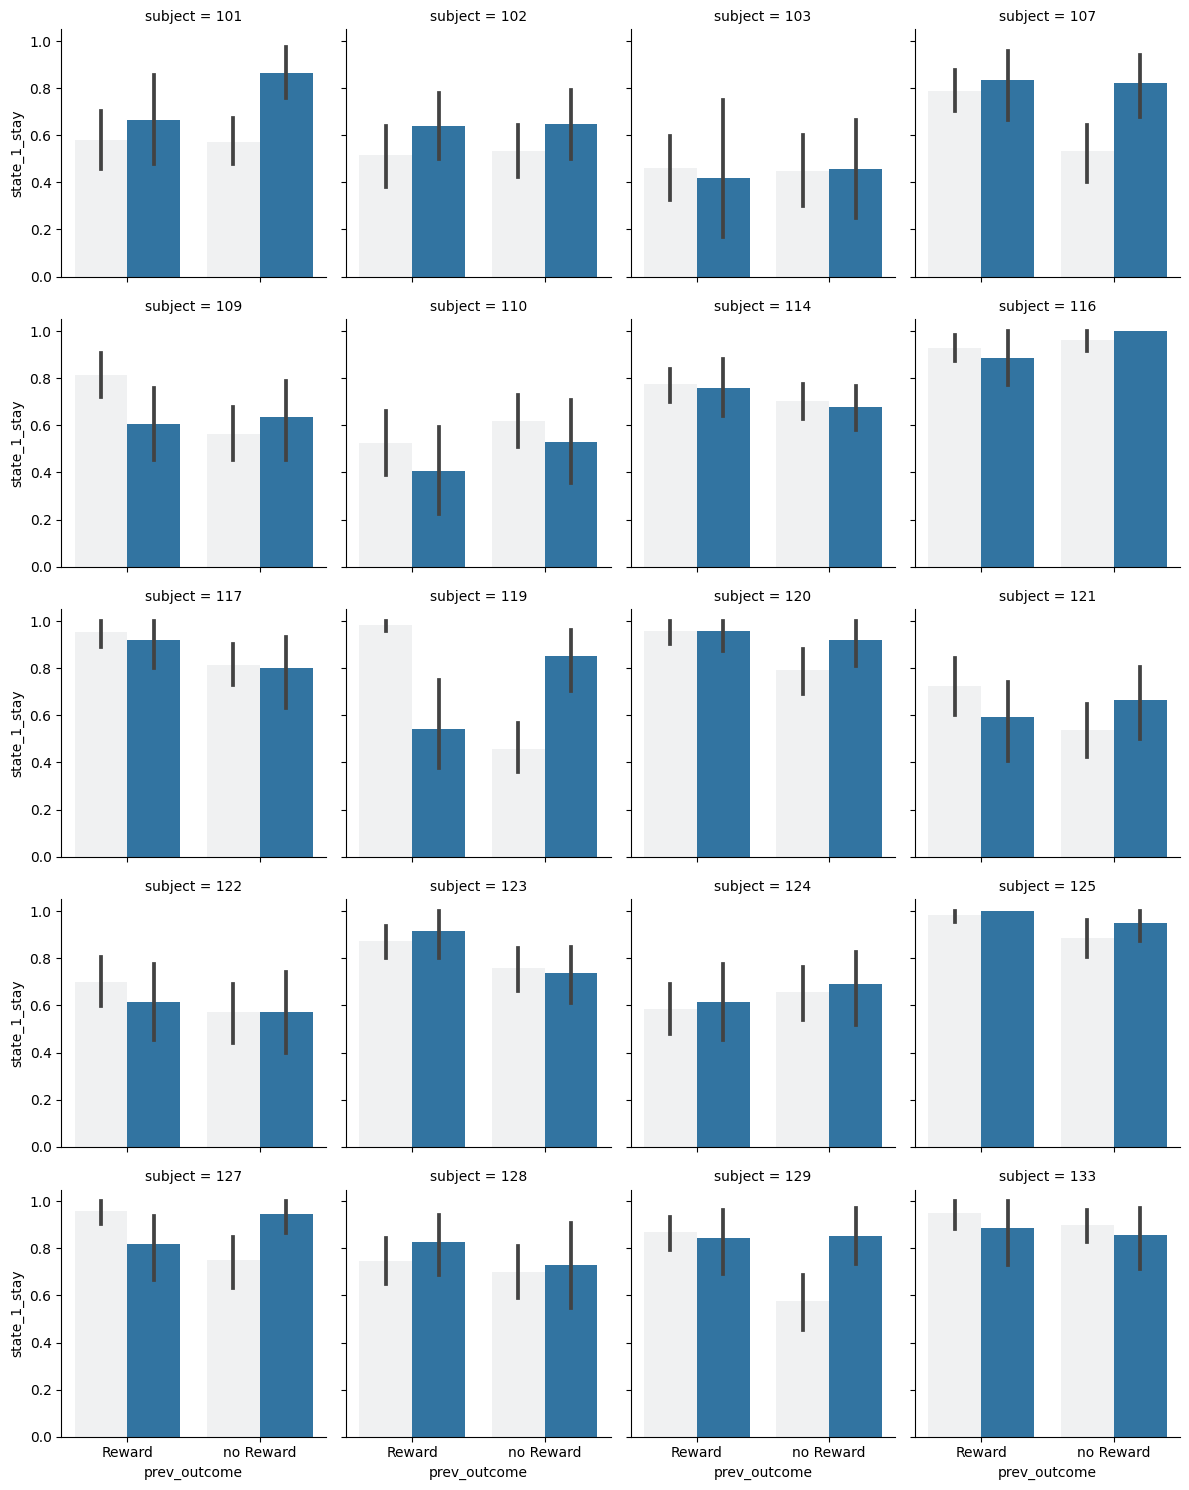

In [96]:
# always same key? looks about 50%
gg = sns.FacetGrid(valid_2steo_data, col="subject", col_wrap=4)

gg.map_dataframe(sns.barplot, x='prev_outcome', y='state_1_stay',
            hue='prev_trans', hue_order=[1,0],
            order=[1,0])

# g = sns.barplot(data=valid_2steo_data,
            # x='prev_outcome', y='state_1_key',
            # hue='prev_trans', hue_order=[1,0],
            # order=[1,0])

gg.set_xticklabels(['Reward', 'no Reward'])

# leg = gg.legend()
leg.set_title('prev transition')

new_labels =['Common', 'Rare']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

#g.set(xlabel="Reward", ylabel = "Stay")


leg.set_title('transition')

new_labels =['Common', 'Rare']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

# plt.axhline(y=.5, c='grey', alpha=.5)




In [75]:
import os, json
import numpy as np
from os.path import dirname, join
from pandas import DataFrame, concat, read_csv
from tqdm import tqdm
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns 

cols = ['trial','drift_ix','state_1_key','state_1_choice','state_1_rt',
                'transition','state','state_2_key','state_2_choice','state_2_rt','outcome',#'fullscreen'
                'minimum_resolution','browser_interactions', 'missing']

In [78]:
f = 'sim/s9999_twostep_202486134754_part2.json'
with open(f, 'r') as tmp:
    JSON = json.load(tmp)

df = [dd for dd in JSON if dd['trial_type'] == 'two-step-trial']
df = DataFrame(df).query('trial > 0') # and missing == False')
df = df[cols]

In [85]:
np.roll(np.array([2,3,4]),1)

array([4, 2, 3])

In [87]:
df['prev_state_1_choice'] = np.roll(df['state_1_choice'],1)

In [90]:
df['state_1_stay'] = df['prev_state_1_choice']== df['state_1_choice']

<AxesSubplot: xlabel='outcome', ylabel='state_1_stay'>

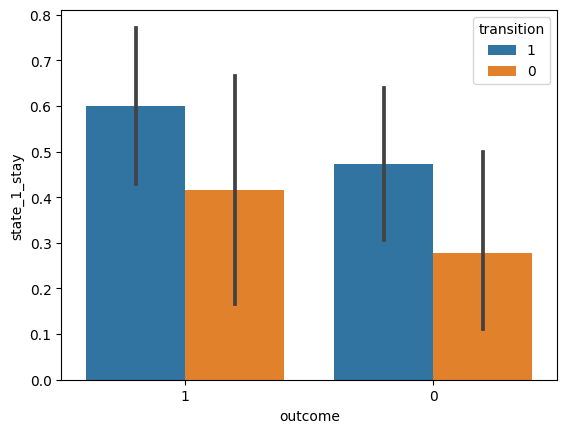

In [92]:
sns.barplot(data=df, x='outcome', hue='transition',y='state_1_stay',  
            hue_order=[1,0],
            order=[1,0])
# (rewarded = 1, unrewarded = 0)
#  (common = 1 rare = 0) 

In [ ]:



def get_data(files, name_index=21):
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Main loop.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

    ## Preallocate space.
    data = []


    for f in tqdm(files):
        
        ## Define subject
        subject = f[name_index:name_index+3]
        
        ## Load JSON.
        with open(f, 'r') as tmp:
            JSON = json.load(tmp)
        
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        ### Assemble data.
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        
        ## Extract two-step task.
        df = [dd for dd in JSON if dd['trial_type'] == 'two-step-trial']
        df = DataFrame(df).query('trial > 0') # and missing == False')
        
        ## Reduce to columns of interest.
     
        df = df[cols]
        
        ## Format columns.
        df['state'] = df.state.replace({0: 2, 1: 3})
        df['state_1_choice'] = df.state_1_choice.replace({0:1, 1:0}) ## why?
        df['state_1_rt'] = np.round(df['state_1_rt'] * 1e-3, 3)
        df['state_2_rt'] = np.round(df['state_2_rt'] * 1e-3, 3)
        df = df.rename(columns={'state': 'state_2'})
        df.insert(0, 'subject', subject)


        df['state_2_local_choice'] = df.state_2_choice.replace({0:0, 1:1, 2:0, 3:1})
        df['prev_outcome'] = np.roll(df.outcome, 1)
        df['prev_trans'] = np.roll(df.transition, 1)
        df['prev_state_1_choice'] = np.roll(df.state_1_choice, 1)
        df['state_1_stay'] = np.where(df.state_1_choice == df.prev_state_1_choice, 1, 0)

        # df = df.query('missing == False')
        df['missing'] = df['missing'].astype(int)
        
        ## Append.
        data.append(df)
        
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Save data.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

    ## Concatenate data.
    data = concat(data).sort_values(['subject','trial'])

    ## Save data.
    # data.to_csv(os.path.join(DATA_DIR , 'twostep.tsv.gz'), index=False, sep='\t', compression='gzip')
    return data




def plot_behvaior(df, x='outcome', y='state_1_stay', hue='transition', ylim=.5):
    '''
    input: dataframe of data, including columns:
        stage_2_outcome - reward
        stage_1_stay - stay 
        comm_trans - common
        exp_group - group
    
    output: none, plots bar
    '''    

    g = sns.catplot(
        data=df, kind="bar",
        x=x, 
        y=y, 
        hue=hue, 
        estimator=mean,
        hue_order=[1, 0], # common / rare
        order=[1,0], #rewarded / unrewarded
  
        legend=True)

    plt.ylim(ylim, None)
    g.set_xticklabels(['rewarded','unrewarded'])
    #g.set(xlabel="Reward", ylabel = "Stay")

    g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
    g.fig.suptitle('Factorial Analysis of Choice Behavior')  
    
    leg = g._legend
    new_labels = ['Common', 'Rare']
    for t, l in zip(leg.texts, new_labels): t.set_text(l)

